In [2]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

<h4>Hands-on: Linear Regression with AWS ML</h4>
Input Features: x<br>
Output/Target Feature: y_noisy<br>
Objective: Simple exercise to get hands-on experience with AWSML.<br>
AWS ML Regression model to predict value of y_noisy for a given x<br>

In [3]:
def straight_line(x):
    return 5*x + 8

In [4]:
straight_line(25)

133

In [5]:
straight_line(1.254)

14.27

In [6]:
np.random.seed(5)
samples = 150
x_vals = pd.Series(np.random.rand(samples)*20)
y_vals = x_vals.map(straight_line)
# Add random noise
y_noisy_vals = y_vals + np.random.randn(samples) * 3

In [7]:
df = pd.DataFrame({'x':x_vals,'y':y_vals, 'y_noisy':y_noisy_vals})

In [8]:
df.head()

,x,y,y_noisy
0,4.439863,30.199317,27.659911
1,17.414646,95.073231,102.635654
2,4.134383,28.671916,24.974757
3,18.372218,99.861091,102.041951
4,9.768224,56.841119,56.978985


In [9]:
# Correlation will indicate how strongly features are related to the output
df.corr()

,x,y,y_noisy
x,1.000000,1.000000,0.995633
y,1.000000,1.000000,0.995633
y_noisy,0.995633,0.995633,1.000000


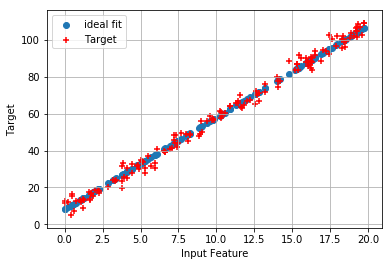

In [10]:
plt.scatter(x=df.x,y=df.y,label='ideal fit')
plt.scatter(x=df.x,y=df.y_noisy, color='r',marker='+',label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()

<h4>Training and Evaluation Set</h4>
Export Row Number, 'x' and 'y_noisy' columns to a CSV file<br>
Row number will not be used for training the model. It is simply used as unique identifier

In [11]:
data_path = r'/Users/jennaolsen/Dropbox/AWS_WhiteRabbit/AWSMLCourse/Data/RegressionExamples/straight_line'

In [12]:
df.to_csv(os.path.join(data_path,'straight_line_example_all.csv'),index=True,index_label='Row')

In [13]:
# 130 rows for Training + Eval Set
df[df.index < 130].to_csv(os.path.join(data_path,'straight_line_noisy_example_train.csv')
                          ,index=True,index_label='Row'
                          ,columns=['x','y_noisy'])

<h4>Test Set</h4>
Test set should contain the same features expect for the target.<br>
Export Row Number, 'x'.

In [14]:
# run all the samples for prediction
df.to_csv(
    os.path.join(data_path,'straight_line_example_test_all.csv'),
    index=True,index_label='Row', columns='x')

<h4>Read the target predicted by AWS ML</h4>

In [16]:
df_predicted = pd.read_csv(os.path.join(data_path,
                                        'output_straight_line_noisy',
                                        '/Users/jennaolsen/Dropbox/AWS_WhiteRabbit/AWSMLCourse/bp-J5F47OsbyKA-straight_line_example_test_all.csv.gz'))

<h4>AWS ML Estimated/Predicted</h4>
Estimated/Predicted value is reported as 'score'. <br>
Tag is the row identifier

In [17]:
df_predicted.head()

,tag,score
0,0,31.41695
1,1,103.71540
2,2,21.76868
3,3,99.43644
4,4,56.91307


In [18]:
df_predicted.columns = ["Row","y_predicted"]

In [19]:
df_predicted.index = df_predicted.Row

In [20]:
df_predicted.head()

,Row,y_predicted
Row,,
0,0,31.41695
1,1,103.71540
2,2,21.76868
3,3,99.43644
4,4,56.91307


<h4>Plot actual value and predicted value</h4>

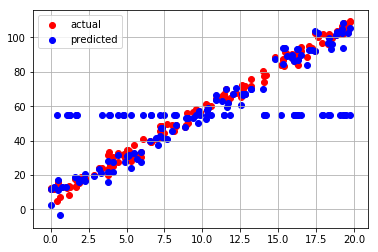

In [21]:
plt.scatter(x=df.x,y=df.y_noisy,color='r',label='actual',)
plt.scatter(x=df.x,y=df_predicted.y_predicted,color='b',label='predicted')
plt.grid(True)
plt.legend()

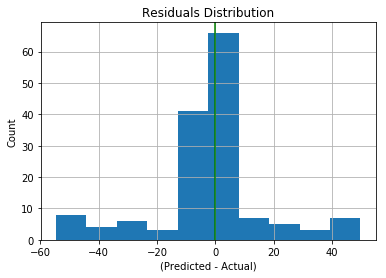

In [22]:
# Training Data Residuals
residuals = (df_predicted.y_predicted - df.y_noisy)

plt.hist(residuals)
plt.grid(True)
plt.xlabel('(Predicted - Actual)')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='g')
# left of 0 = prediction < actual
# right of 0 = prediction > actual

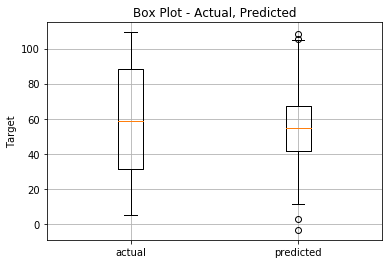

In [23]:
plt.boxplot([df.y_noisy,df_predicted.y_predicted], labels=['actual','predicted'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target')
plt.grid(True)

<h4>Predicted value has lot more noise</h4>
Default AWS ML setting transformed x from numeric to bins.<br>
In this case, binning caused more jitter.<br>
Let's rerun the model by updating recipe to treat x as numeric<br>
Model with x binned: <br>
Training rmse=14.5376, Evaluation rmse=13.011,  Baseline rmse=30.404<br>
Model with x as numeric: <br>
Training rmse=4.4563, Evaluation rmse=2.4838, Baseline rmse=30.404


In [25]:
df_predicted_numeric = pd.read_csv(os.path.join(data_path,
                                        'output_straight_line_noisy_numeric',
                                        '/Users/jennaolsen/Dropbox/AWS_WhiteRabbit/AWSMLCourse/bp-1mpypDzM26J-straight_line_example_test_all.csv.gz'))

In [26]:
df_predicted_numeric.columns = ["Row","y_predicted"]

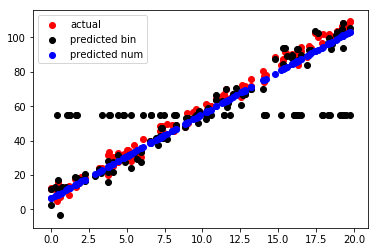

In [27]:
plt.scatter(x=df.x,y=df.y_noisy,color='r',label='actual',)
plt.scatter(x=df.x,y=df_predicted.y_predicted,color='k',label='predicted bin')
plt.scatter(x=df.x,y=df_predicted_numeric.y_predicted,color='b',label='predicted num')
plt.legend()

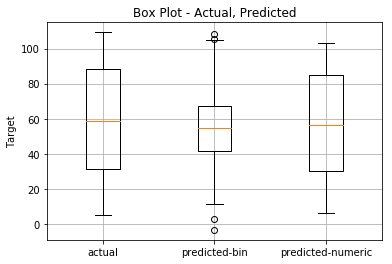

In [28]:
plt.boxplot([df.y_noisy,df_predicted.y_predicted,df_predicted_numeric.y_predicted], 
            labels=['actual','predicted-bin','predicted-numeric'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target')
plt.grid(True)

<h4>Summary</h4>

RMSE (Root Mean Square Error) is the evaluation metric for Linear Regression.  Smaller the value of RMSE, better the predictive accuracy of model. Perfect model would have RMSE of 0.

To prepare data for AWS ML, it requires data to be in:
1. CSV file available in S3
2. AWS Redshift Datawarehouse
3. AWS Relational Database Service (RDS) MySQL DB

Batch Prediction results are stored by AWS ML to S3 in the specified bucket

We pulled the data from S3 to local folder and plotted them

Based on the distribution of data, AWS ML suggests a recipe for processing data.<br>
In case of numeric features, it may suggest binning the data instead of treating a raw numeric<br>
For this example, treating x as numeric provided best results.